<a href="https://colab.research.google.com/github/Asfiya-edu/Train-Ticket-Price-Prediction-using-Machine-Learning/blob/main/Train_Ticket_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement:** Develop a regression model using historical travel package data to predict prices.

Dataset: [Train Price Prediction](https://drive.google.com/file/d/1mpkljxu5o4xenVe9bJu4ZbY1vkUNP8ig/view?usp=sharing)

DATASET LINK: https://drive.google.com/file/d/1mpkljxu5o4xenVe9bJu4ZbY1vkUNP8ig/view

We have seen the flight price prediction. Now you are going to predict the train fare in the same way. Perform Feature selection and Encoding on the data. Apply Regression models and compare the results using the metrics.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [ ]:
# Load Dataset
filepath= "/content/drive/MyDrive/alma better/data1.csv"
df = pd.read_csv(filepath)

In [ ]:
df.head(10)

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo
5,989,2019-04-19 05:41:52,MADRID,VALENCIA,2019-06-17 06:08:00,2019-06-17 12:55:00,REGIONAL,28.35,Turista,Adulto ida
6,990,2019-04-19 05:41:52,MADRID,VALENCIA,2019-06-17 12:21:00,2019-06-17 19:04:00,REGIONAL,28.35,Turista,Adulto ida
7,991,2019-04-19 05:41:52,MADRID,VALENCIA,2019-06-17 16:05:00,2019-06-17 22:47:00,REGIONAL,28.35,Turista,Adulto ida
8,992,2019-04-19 05:42:00,MADRID,VALENCIA,2019-06-16 06:20:00,2019-06-16 12:55:00,REGIONAL,28.35,Turista,Adulto ida
9,993,2019-04-19 05:42:00,MADRID,VALENCIA,2019-06-16 12:42:00,2019-06-16 19:04:00,REGIONAL,28.35,Turista,Adulto ida


## **Data Statistics**

### **Following is the description for columns in the dataset**

**insert_date:** date and time when the price was collected and written in the database

**origin:** origin city

**destination:** destination city

**start_date:** train departure time

**end_date:** train arrival time

**train_type:** train service name

**price:** price

**train_class:** ticket class, tourist, business, etc.

**fare:** ticket fare, round trip, etc

In [ ]:
print(df.apply(lambda col:col.unique()))

Unnamed: 0     [702, 703, 704, 705, 706, 989, 990, 991, 992, ...
insert_date    [2019-04-19 05:37:35, 2019-04-19 05:41:52, 201...
origin         [PONFERRADA, MADRID, SEVILLA, VALENCIA, BARCEL...
destination    [MADRID, VALENCIA, BARCELONA, PONFERRADA, SEVI...
start_date     [2019-06-02 15:00:00, 2019-06-02 17:15:00, 201...
end_date       [2019-06-02 19:42:00, 2019-06-02 23:03:00, 201...
train_type     [MD-AVE, MD-LD, ALVIA, REGIONAL, AVE, INTERCIT...
price          [59.5, 34.65, 39.95, 40.6, 27.9, 28.35, 21.95,...
train_class    [Turista con enlace, Turista, Preferente, Turi...
fare           [Flexible, Promo +, Promo, Adulto ida, Mesa, nan]
dtype: object


In [ ]:
unique_value_counts = {}
for column in df:
    unique_values = df.iloc[:, df.columns.get_loc(column)].unique()
    unique_value_counts[column] = len(unique_values)

unique_value_counts

{'Unnamed: 0': 215909,
 'insert_date': 30543,
 'origin': 5,
 'destination': 5,
 'start_date': 2231,
 'end_date': 2870,
 'train_type': 16,
 'price': 142,
 'train_class': 6,
 'fare': 6}

In [ ]:
df.describe()

,Unnamed: 0,price
count,2.159090e+05,202321.000000
mean,1.303185e+06,56.723877
std,6.071288e+05,25.531787
min,7.020000e+02,16.600000
25%,9.026100e+05,28.350000
50%,1.427927e+06,53.400000
75%,1.575116e+06,76.300000
max,2.579721e+06,206.800000


In [ ]:
df.isnull().sum()

Unnamed: 0         0
insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215909 entries, 0 to 215908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215909 non-null  int64  
 1   insert_date  215909 non-null  object 
 2   origin       215909 non-null  object 
 3   destination  215909 non-null  object 
 4   start_date   215909 non-null  object 
 5   end_date     215909 non-null  object 
 6   train_type   215909 non-null  object 
 7   price        202321 non-null  float64
 8   train_class  215266 non-null  object 
 9   fare         215266 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 16.5+ MB


In [ ]:
df.shape

(215909, 10)

In [ ]:
# Drop 'unnamed' column and 'insert date' column
df=df.drop('Unnamed: 0', axis=1)
df=df.drop('insert_date', axis=1)

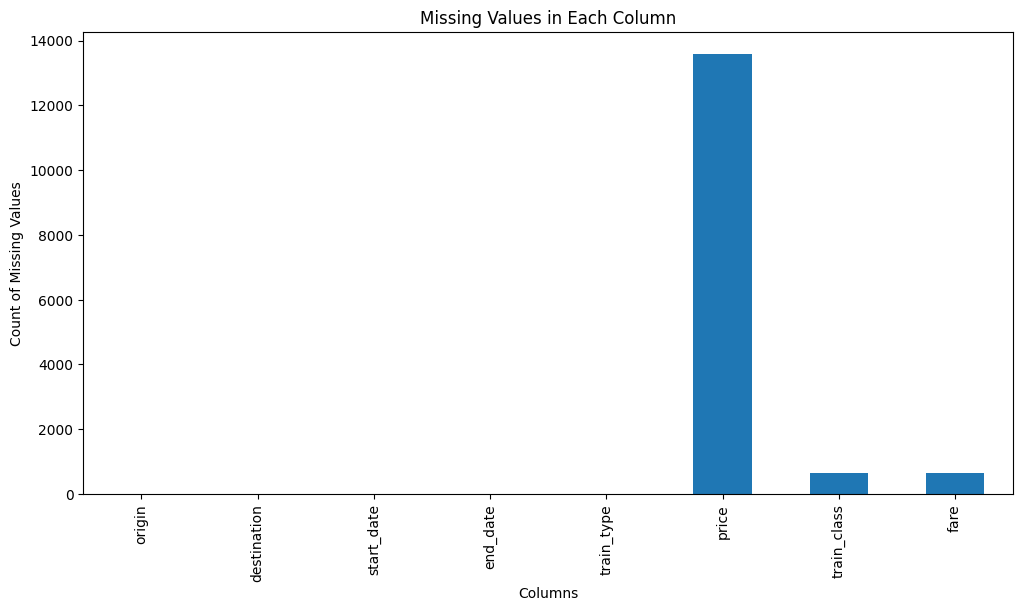

In [ ]:
# Calculate missing values for each column
missing_values = df.isnull().sum()

# Create a bar chart to visualize missing values
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=90)
plt.show()

## **Data Preprocessing**

### Hanling missing values

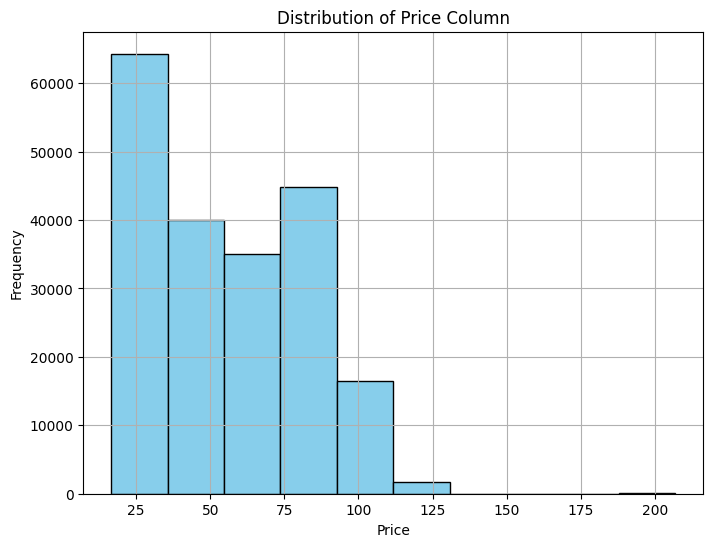

In [ ]:
# Plot the distribution of 'price' column
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
df.shape

(215909, 8)

In [ ]:
# filling missing value in price value using mean
mean_price = df['price'].mean()
df['price'] = df['price'].fillna(mean_price)

# dropping na values in train_class column
df.dropna(subset=['train_class'], inplace=True)
df.dropna(subset=['fare'], inplace=True)

In [ ]:
df.shape

(215266, 8)

In [ ]:
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

In [ ]:
print(df.head(10))

       origin destination           start_date             end_date  \
0  PONFERRADA      MADRID  2019-06-02 15:00:00  2019-06-02 19:42:00   
1  PONFERRADA      MADRID  2019-06-02 17:15:00  2019-06-02 23:03:00   
2  PONFERRADA      MADRID  2019-06-02 17:15:00  2019-06-02 23:10:00   
3  PONFERRADA      MADRID  2019-06-02 17:15:00  2019-06-02 22:14:00   
4  PONFERRADA      MADRID  2019-06-02 18:55:00  2019-06-02 23:03:00   
5      MADRID    VALENCIA  2019-06-17 06:08:00  2019-06-17 12:55:00   
6      MADRID    VALENCIA  2019-06-17 12:21:00  2019-06-17 19:04:00   
7      MADRID    VALENCIA  2019-06-17 16:05:00  2019-06-17 22:47:00   
8      MADRID    VALENCIA  2019-06-16 06:20:00  2019-06-16 12:55:00   
9      MADRID    VALENCIA  2019-06-16 12:42:00  2019-06-16 19:04:00   

  train_type  price         train_class        fare  
0     MD-AVE  59.50  Turista con enlace    Flexible  
1     MD-AVE  34.65  Turista con enlace     Promo +  
2      MD-LD  39.95  Turista con enlace     Promo +  
3 

In [ ]:
# Formatting date and time column
# Convert 'start_date' and 'end_date' columns to datetime format
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

# Calculate the time difference and store it in a new column
df['duration_to_reach_destination'] = df['end_date'] - df['start_date']

In [ ]:
df.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare,duration_to_reach_destination
0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible,0 days 04:42:00
1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +,0 days 05:48:00
2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +,0 days 05:55:00
3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +,0 days 04:59:00
4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo,0 days 04:08:00


## **Exploratory Data Analysis**

### **Visualizations explore the dataset and uncover interesting patterns and relationships within the data.**

### **Chart 1: Number of people boarding from different stations**

In [ ]:
# # Create a count plot for the 'origin' column
# plt.figure(figsize=(10, 6))
# sns.countplot(x='origin', data=df, palette='viridis')
# plt.title('Number of People Boarding from Different Stations')
# plt.xlabel('Station')
# plt.ylabel('Number of People')
# plt.xticks(rotation=45)
# plt.show()


Based on the insight provided, it suggests that Madrid is the main station or central hub connecting to other stations in the network. This conclusion is drawn from the observation that the majority of people boarding the trains are from Madrid, implying that it serves as a primary departure point for travelers.

### **Chart 2: Origin-Destination Analysis:**

Create a geographical plot showing the origin and destination cities, with lines representing train routes between them. This can provide insights into the connectivity between different cities.

In [ ]:
# import networkx as nx

# # Create a directed graph
# G = nx.DiGraph()

# # Add edges for train routes
# for _, row in df.iterrows():
#     origin, destination = row['origin'], row['destination']
#     G.add_edge(origin, destination)

# # Plot the graph
# plt.figure(figsize=(10, 6))
# pos = nx.spring_layout(G)  # positions for all nodes
# nx.draw_networkx_nodes(G, pos, node_size=700)
# nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, arrows=True)
# nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
# plt.title('Origin-Destination Train Routes (Network Graph)')
# plt.axis('off')
# plt.show()


The geographical plot depicting the origin and destination cities, with lines representing train routes between them, offers a comprehensive overview of the connectivity between different cities within the train network. By observing the plot, it becomes evident that Madrid plays a crucial role in connecting various stations together. The lines representing train routes emanating from Madrid extend to several other cities, indicating extensive connectivity and a dense network of train services originating from the capital.

### **Chart 3: Different types of train**

In [ ]:
# # Count the occurrences of each train type
# train_type_counts = df['train_type'].value_counts()

# # Plot the count of each train type
# plt.figure(figsize=(10, 6))
# train_type_counts.plot(kind='bar', color='skyblue')
# plt.title('Number of Trains by Type')
# plt.xlabel('Train Type')
# plt.ylabel('Number of Trains')
# plt.xticks(rotation=45)
# plt.show()

### **Chart 4: Trains of differnt class**

In [ ]:
# # Count the occurrences of each train class
# train_class_counts = df['train_class'].value_counts()

# # Plot the distribution of train classes using a pie chart
# plt.figure(figsize=(8, 8))
# plt.pie(train_class_counts, labels=train_class_counts.index, autopct='%1.1f%%', startangle=140)
# plt.title('Distribution of Trains by Class')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.show()

Turista ==> 2nd class

Preferente ==> 1st class

Turista Plus ==> 2nd class with more comfort

Turista con enlace ==> with change

Cama Turista ==> Sleeper

### **Chart 5: Fare distribution**

In [ ]:
# # Plot the fare distribution using a histogram
# plt.figure(figsize=(10, 6))
# plt.hist(df['fare'], bins=10, color='skyblue', edgecolor='black')
# plt.title('Fare Distribution')
# plt.xlabel('Fare')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()


## **Chart 6: Price Distribution by Train Type**

In [ ]:
# # Plot the price distribution by train type using a box plot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='train_type', y='price', data=df, palette='viridis')
# plt.title('Price Distribution by Train Type')
# plt.xlabel('Train Type')
# plt.ylabel('Price')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

## **Chart 7: Price Variation over Time:**

In [ ]:
# Convert timedelta64[ns] to numerical format (seconds)
df['duration_seconds'] = df['duration_to_reach_destination'].dt.total_seconds()

# Calculate correlation between 'price' and 'duration_seconds'
correlation = df['price'].corr(df['duration_seconds'])

print("Correlation between 'price' and 'duration_to_reach_destination':", correlation)


Correlation between 'price' and 'duration_to_reach_destination': -0.5692509282019008


In [ ]:
df.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare,duration_to_reach_destination,duration_seconds
0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible,0 days 04:42:00,16920.0
1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +,0 days 05:48:00,20880.0
2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +,0 days 05:55:00,21300.0
3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +,0 days 04:59:00,17940.0
4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo,0 days 04:08:00,14880.0


In [ ]:
# # Plot scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(df['duration_seconds'], df['price'], color='skyblue', alpha=0.7)
# plt.title('Price vs. Duration to Reach Destination')
# plt.xlabel('Duration to Reach Destination (seconds)')
# plt.ylabel('Price')
# plt.grid(True)
# plt.show()

Here's what the correlation coefficient indicates:

* As the price of the train tickets increases, the duration to reach the
destination tends to decrease.

* Similarly, as the duration to reach the destination increases, the price of the train tickets tends to decrease.

* However, it's important to note that correlation does not imply causation.

* While there is a correlation between these two variables, it doesn't necessarily mean that changes in one variable cause changes in the other.

 Other factors may also influence both the price of train tickets and the duration of the journey.

In practical terms, a negative correlation between price and duration could mean that more expensive train tickets are associated with faster, possibly more direct routes, while cheaper tickets may involve longer, possibly more indirect routes or slower train services.

## **Chart 8: Price Distribution by Train Class**

In [ ]:
# # Plot the price distribution by train class using a box plot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='train_class', y='price', data=df, palette='viridis')
# plt.title('Price Distribution by Train Class')
# plt.xlabel('Train Class')
# plt.ylabel('Price')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

## **Chart 9: Price Fluctuations over Dates:**

Plot the average ticket prices over different dates (start_date or end_date). This can help identify patterns in price fluctuations over different times of the year or week.

In [ ]:
df.head()

,origin,destination,start_date,end_date,train_type,price,train_class,fare,duration_to_reach_destination,duration_seconds
0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible,0 days 04:42:00,16920.0
1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +,0 days 05:48:00,20880.0
2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +,0 days 05:55:00,21300.0
3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +,0 days 04:59:00,17940.0
4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo,0 days 04:08:00,14880.0


In [ ]:
# # Plot price fluctuations over dates using a scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(df['start_date'], df['price'], color='skyblue', marker='o')
# plt.title('Price Fluctuations Over Dates (Scatter Plot)')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()

## **Chart 10: Train Type vs. Fare**

Compare the average fares across different train types using a grouped bar chart or box plot. This can help understand how fares vary between different service providers.

In [ ]:
# # Plot Train Type vs. Fare using a bar plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x='train_type', y='fare', data=df, palette='viridis')
# plt.title('Train Type vs. Fare')
# plt.xlabel('Train Type')
# plt.ylabel('Fare')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

## **Chart 11: Duration of Train Journeys**

Calculate the duration of train journeys (end_date - start_date) and visualize the distribution of journey durations. This can reveal insights into the typical length of train journeys.

In [ ]:
df.columns

Index(['origin', 'destination', 'start_date', 'end_date', 'train_type',
       'price', 'train_class', 'fare', 'duration_to_reach_destination',
       'duration_seconds'],
      dtype='object')

In [ ]:
# # Plot the distribution of journey durations using a histogram
# plt.figure(figsize=(10, 6))
# plt.hist(df['duration_to_reach_destination'].dt.total_seconds() / 3600, bins=10, color='skyblue', edgecolor='black')
# plt.title('Distribution of Train Journey Durations')
# plt.xlabel('Journey Duration (hours)')
# plt.ylabel('Frequency')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

## **Chart 12: Price vs. Duration Scatter Plot**

Create a scatter plot with price on the y-axis and journey duration on the x-axis. This can help identify any correlation between ticket prices and journey durations.

In [ ]:
# # Plot Price vs. Duration Scatter Plot
# plt.figure(figsize=(10, 6))
# plt.scatter(df['duration_to_reach_destination'].dt.total_seconds() / 3600, df['price'], color='skyblue', marker='o')
# plt.title('Price vs. Duration Scatter Plot')
# plt.xlabel('Journey Duration (hours)')
# plt.ylabel('Price')
# plt.grid(True)
# plt.show()

## **Chart 13: Train Type vs. Origin-Destination**

Create a heatmap or bar plot showing the frequency of different train types for each origin-destination pair. This can provide insights into the popularity of different train services for specific routes.

In [ ]:
# # Create a pivot table to calculate the frequency of each train type for each origin-destination pair
# pivot_table = df.pivot_table(index='origin', columns='destination', values='train_type', aggfunc='count', fill_value=0)

# # Plot the heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='d')
# plt.title('Train Type Frequency by Origin-Destination')
# plt.xlabel('Destination')
# plt.ylabel('Origin')
# plt.show()

The heatmap visualization "Train Type Frequency by Origin-Destination" provides several insights:

1. **Popular Routes**: The heatmap highlights the routes with the highest frequency of train services. Regions with darker colors indicate routes with more train services, suggesting higher demand or connectivity between those origin and destination pairs.

2. **Distribution of Train Types**: By observing the distribution of train types across different origin-destination pairs, we can identify patterns in the types of trains used for specific routes. For example, certain routes may primarily use express trains, while others may rely more on regional or local trains.

3. **Service Coverage**: Sparse areas or lighter colors in the heatmap may indicate routes with fewer train services or limited connectivity. This information can be valuable for transportation planning and infrastructure development.

4. **Demand Analysis**: Higher frequencies of train services on certain routes may suggest higher passenger demand or economic activity between those origin and destination cities. Conversely, lower frequencies may indicate lower demand or less traveled routes.

5. **Operational Insights**: Transportation authorities and service providers can use this visualization to analyze the distribution of train types and optimize service offerings based on demand, route popularity, and operational efficiency.

Overall, the heatmap provides a comprehensive view of the frequency of different train types for each origin-destination pair, allowing stakeholders to make data-driven decisions related to route planning, service optimization, and resource allocation.

### **Handling Outliers**

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# # Replace outliers with NaN (or you can choose to remove them or replace with a different value)
# df['price_handled'] = df['price'].apply(lambda x: x if lower_bound <= x <= upper_bound else None)

# Calculate mode of 'price' column
mode_price = df['price'].mode()[0]

# Replace outliers with mode value
df['price_handled'] = df['price'].apply(lambda x: mode_price if (x < lower_bound or x > upper_bound) else x)


In [ ]:
# Print the number of missing values in the 'price_handled' column
print(df['price_handled'].isnull().sum())

0


In [ ]:
df.drop(columns=['price'], inplace=True)

In [ ]:
df.dtypes

origin                                    object
destination                               object
start_date                        datetime64[ns]
end_date                          datetime64[ns]
train_type                                object
train_class                               object
fare                                      object
duration_to_reach_destination    timedelta64[ns]
duration_seconds                         float64
price_handled                            float64
dtype: object

In [ ]:
'''
# Create subplots for before and after box plots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Box plot before handling outliers
axs[0].boxplot(df['price'], vert=False)
axs[0].set_title('Box Plot of Price (Before Handling Outliers)')
axs[0].set_xlabel('Price')

# Box plot after handling outliers
axs[1].boxplot(df['price_handled'].dropna(), vert=False)
axs[1].set_title('Box Plot of Price (After Handling Outliers)')
axs[1].set_xlabel('Price')


# Show plot
plt.tight_layout()
plt.show()
'''

"\n# Create subplots for before and after box plots\nfig, axs = plt.subplots(1, 2, figsize=(12, 6))\n\n# Box plot before handling outliers\naxs[0].boxplot(df['price'], vert=False)\naxs[0].set_title('Box Plot of Price (Before Handling Outliers)')\naxs[0].set_xlabel('Price')\n\n# Box plot after handling outliers\naxs[1].boxplot(df['price_handled'].dropna(), vert=False)\naxs[1].set_title('Box Plot of Price (After Handling Outliers)')\naxs[1].set_xlabel('Price')\n\n\n# Show plot\nplt.tight_layout()\nplt.show()\n"

## **One-hot Encoding Categorical**

In [ ]:
df

,origin,destination,start_date,end_date,train_type,train_class,fare,duration_to_reach_destination,duration_seconds,price_handled
0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,Turista con enlace,Flexible,0 days 04:42:00,16920.0,59.50
1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,Turista con enlace,Promo +,0 days 05:48:00,20880.0,34.65
2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,Turista con enlace,Promo +,0 days 05:55:00,21300.0,39.95
3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,Turista con enlace,Promo +,0 days 04:59:00,17940.0,40.60
4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,Turista,Promo,0 days 04:08:00,14880.0,27.90
...,...,...,...,...,...,...,...,...,...,...
215904,MADRID,SEVILLA,2019-06-01 17:00:00,2019-06-01 19:38:00,AVE,Turista,Promo,0 days 02:38:00,9480.0,47.30
215905,MADRID,SEVILLA,2019-06-01 18:00:00,2019-06-01 20:32:00,AVE,Turista,Promo,0 days 02:32:00,9120.0,47.30
215906,MADRID,SEVILLA,2019-06-01 19:00:00,2019-06-01 21:38:00,AVE,Turista,Promo,0 days 02:38:00,9480.0,47.30
215907,MADRID,SEVILLA,2019-06-01 20:35:00,2019-06-01 23:15:00,AVE,Turista,Promo,0 days 02:40:00,9600.0,47.30


In [ ]:
df.isnull().sum()

origin                           0
destination                      0
start_date                       0
end_date                         0
train_type                       0
train_class                      0
fare                             0
duration_to_reach_destination    0
duration_seconds                 0
price_handled                    0
dtype: int64

In [ ]:

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(df[['origin', 'destination', 'train_type', 'train_class', 'fare']])

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['origin', 'destination', 'train_type', 'train_class', 'fare']))



### Applying PCA on encoded columns

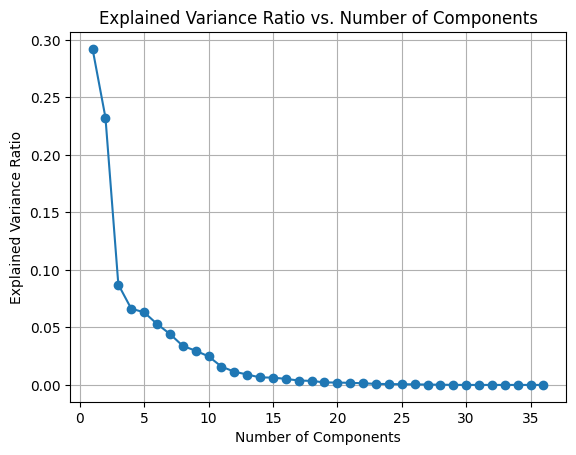

In [ ]:
# Visualizing optimun number of components for PCA
# Initialize PCA
pca = PCA()

# Fit PCA to the standardized data
pca.fit(encoded_df)

# Compute the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio against the component number
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
# Reduce dimensionality using PCA with 11 components
pca = PCA(n_components=11)
X_pca = pca.fit_transform(encoded_df)

# Convert PCA results to a DataFrame
pca_columns = [f'PC{i+1}' for i in range(11)]
df_pca = pd.DataFrame(data=X_pca, columns=pca_columns)

# Display the DataFrame
print(df_pca.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.264497  0.676314  1.089663  0.714374 -0.097434  0.751569  0.501622   
1  0.261804  0.638700  1.016541  0.209513 -0.065573  0.635397  0.315845   
2  0.260328  0.633606  1.023525  0.197317 -0.070341  0.613375  0.321463   
3  0.261804  0.638700  1.016541  0.209513 -0.065573  0.635397  0.315845   
4 -0.030851  0.640802  0.084486  0.194608 -0.079313 -0.107367  0.077324   

        PC8       PC9      PC10      PC11  
0 -0.024468 -0.233848  0.857644  0.416857  
1  0.227867  0.058303  1.015609  1.120139  
2  0.232010  0.068826  1.005168  1.115728  
3  0.227867  0.058303  1.015609  1.120139  
4  0.669242  0.637506  0.420123 -0.316469  


In [ ]:
# # Drop the original categorical columns
df.drop(columns=['origin', 'destination', 'train_type', 'train_class', 'fare'], inplace=True)

In [ ]:
df.shape

(215266, 5)

In [ ]:
df_pca.shape

(215266, 11)

## **Feature Engineering**

In [ ]:
# stnadartdize the original dataset numerical values
df['start_month'] = df['start_date'].dt.month
df['start_day'] = df['start_date'].dt.day

df['end_month'] = df['end_date'].dt.month
df['end_day'] = df['end_date'].dt.day

# Drop the original datetime columns
df.drop(columns=['start_date', 'end_date'], inplace=True)

# Convert timedelta to total seconds (numeric representation)
df['duration_seconds'] = df['duration_to_reach_destination'].dt.total_seconds()

# Drop the original timedelta column
df.drop(columns=['duration_to_reach_destination'], inplace=True)

In [ ]:
# standardize the df dataset
# Initialize StandardScaler
scaler = StandardScaler()

# Apply standard scaling to selected columns
df_scaled = df.copy()  # Create a copy of the DataFrame
df_scaled = scaler.fit_transform(df_scaled)

# Convert the scaled NumPy array back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Display the head of the scaled DataFrame
df_scaled.head()

,duration_seconds,price_handled,start_month,start_day,end_month,end_day
0,0.278446,0.114763,0.0,-0.750425,0.0,-0.752187
1,0.770643,-0.893916,0.0,-0.750425,0.0,-0.752187
2,0.822846,-0.678785,0.0,-0.750425,0.0,-0.752187
3,0.405224,-0.652401,0.0,-0.750425,0.0,-0.752187
4,0.024890,-1.167903,0.0,-0.750425,0.0,-0.752187


In [ ]:
# concat pca dataframe with original dataset
df_pca_concat = pd.concat([df_scaled, df_pca], axis=1)
df_pca_concat.head()

,duration_seconds,price_handled,start_month,start_day,end_month,end_day,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.278446,0.114763,0.0,-0.750425,0.0,-0.752187,0.264497,0.676314,1.089663,0.714374,-0.097434,0.751569,0.501622,-0.024468,-0.233848,0.857644,0.416857
1,0.770643,-0.893916,0.0,-0.750425,0.0,-0.752187,0.261804,0.638700,1.016541,0.209513,-0.065573,0.635397,0.315845,0.227867,0.058303,1.015609,1.120139
2,0.822846,-0.678785,0.0,-0.750425,0.0,-0.752187,0.260328,0.633606,1.023525,0.197317,-0.070341,0.613375,0.321463,0.232010,0.068826,1.005168,1.115728
3,0.405224,-0.652401,0.0,-0.750425,0.0,-0.752187,0.261804,0.638700,1.016541,0.209513,-0.065573,0.635397,0.315845,0.227867,0.058303,1.015609,1.120139
4,0.024890,-1.167903,0.0,-0.750425,0.0,-0.752187,-0.030851,0.640802,0.084486,0.194608,-0.079313,-0.107367,0.077324,0.669242,0.637506,0.420123,-0.316469


In [ ]:
df_pca_concat.shape

(215266, 17)

## **Train Test Splitting of the dataset**

In [ ]:

# Extract the 'price_handled' column from df_encoded
y = df_pca_concat['price_handled']

# Drop the 'price_handled' column from df_encoded
X = df_pca_concat.drop(columns=['price_handled'])


In [ ]:
print(X.shape)
print(y.shape)

(215266, 16)
(215266,)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(172212, 16)
(172212,)
(43054, 16)
(43054,)


# **Model Creation and Training**

In [ ]:
linear regression
random forest
decision tree
XGboost

## **Linear Regression Model**

Mean Absolute Error (MAE): 0.3354857927419123
Mean Squared Error (MSE): 0.22826038055566733
Root Mean Squared Error (RMSE): 0.47776603118646616
R-squared (R2): 0.7699793495195044


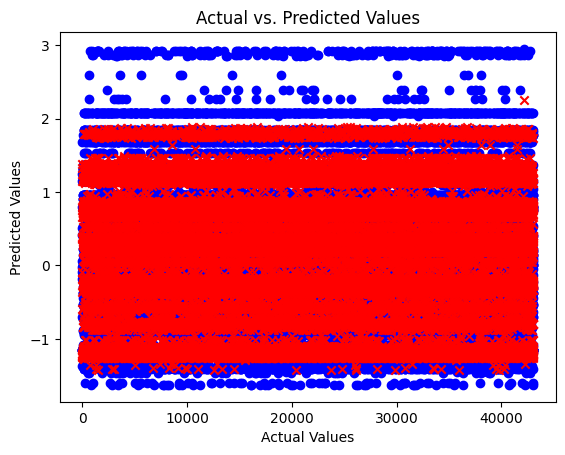

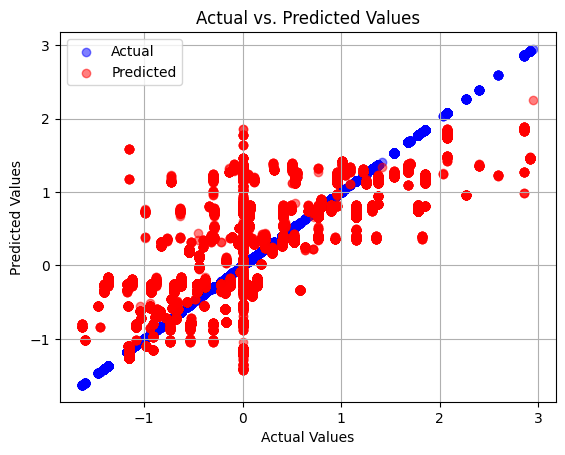

In [ ]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

plt.scatter(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')
plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

plt.scatter(y_test, y_test, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test, y_pred, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## **Desicion Tree**

Mean Squared Error (MSE): 0.07517618749751225
Root Mean Squared Error (RMSE): 0.2741827629474768
Mean Absolute Error (MAE): 0.1378050847726367
R-squared (R2) Score: 0.9242440781587835


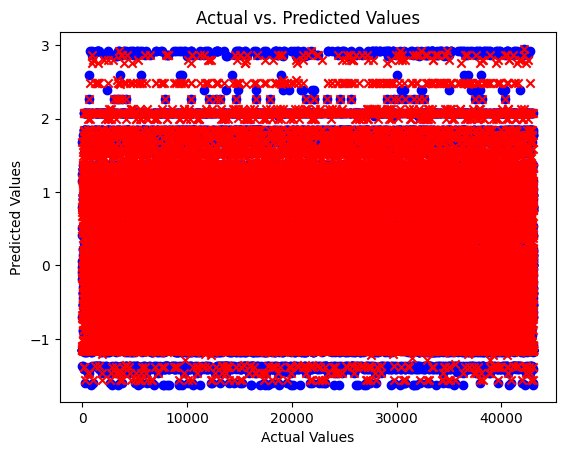

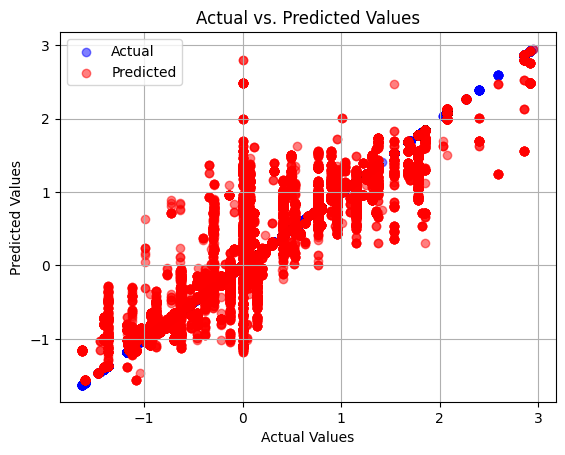

In [ ]:
# Initialize the Decision Tree Regressor model
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
decision_tree_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

plt.scatter(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')
plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

plt.scatter(y_test, y_test, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test, y_pred, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


## **Random Forest**

Mean Absolute Error (MAE): 0.17656783955687994
Mean Squared Error (MSE): 0.0995148092421816
Root Mean Squared Error (RMSE): 0.3154596792653248
R-squared (R2): 0.8997177648674488


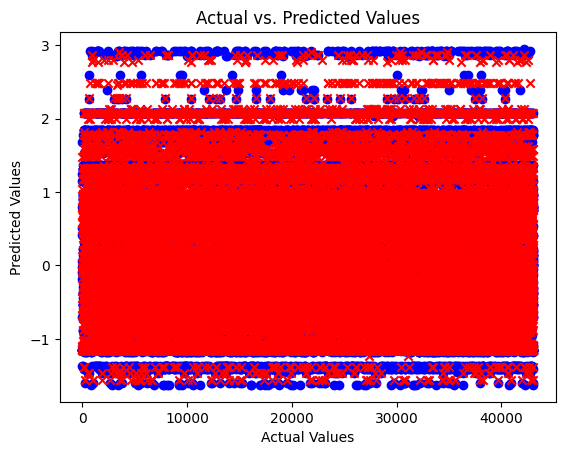

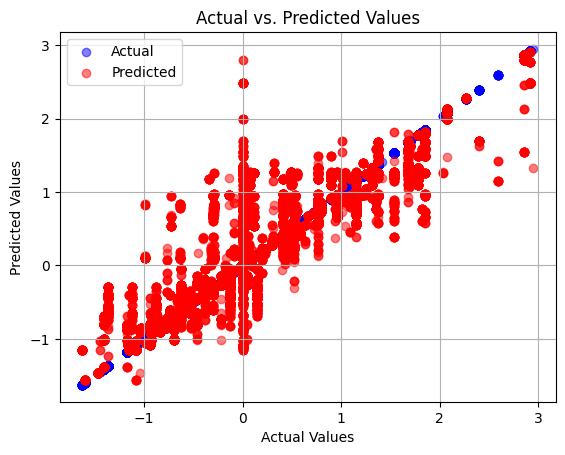

In [ ]:
# Create and train the Linear Regression model
model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split= 2, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

plt.scatter(np.arange(len(y_test)), y_test, label='Actual', color='blue', marker='o')
plt.scatter(np.arange(len(y_pred)), y_pred, label='Predicted', color='red', marker='x')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Assuming y_test contains the actual values and y_pred contains the predicted values

plt.scatter(y_test, y_test, c='b', label='Actual', alpha=0.5)  # Blue for actual
plt.scatter(y_test, y_pred, c='r', label='Predicted', alpha=0.5)  # Red for predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()